# Time Series Forecasting Population of Chitala Fish from Catch Data for next 10 Years using Best Models for each site.

In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Best Model for site1-Diamond harbour : Convlstm

In [3]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
import pandas as pd
import numpy as np
# Defining a function to split a univariate sequence into samples for LSTM Model
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

tdw=pd.Series([2016])
train_data=data[~data['Year '].isin(tdw)]
test_data=data[data['Year '].isin(tdw)]
test_data=test_data.set_index(np.arange(0,len(test_data)))
n_step1 = 4
# split into samples
X, y = split_sequence(data.Value, n_step1)

n_features = 1
n_seq = 2
n_step2 = int(n_step1/2)
X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
ypr=[]
yr=9*12
x=data.Value.iloc[36:].values
i=0
for k in range(yr):
    x_input, y_input = split_sequence(x, n_step1)
            #x_input = array([70, 80, 90])
    x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))
    yhat = model.predict(x_input, verbose=0)
    x = np.append(x,yhat)
    x=x[8:]
    ypr.append(yhat.reshape(-1)[0])
yer=np.repeat(np.arange(2016,2025),12)
pred = pd.DataFrame({'Year':yer,'Future_prediction':ypr}) 
pred.to_csv('Bestmodel_convlstm_DH.csv')
valu=[]
year = np.arange(2016,2025)
for i in range(len(year)):
    val = pred[pred['Year']==year[i]]['Future_prediction'].mean()
    valu.append(val)
mean_pred=pd.DataFrame({'Year':year,'Mean_prediction':valu})

In [5]:
best = pd.read_csv('Bestmodel_convlstm_DH.csv')
old = pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')
old = pd.DataFrame({'Year':old['Year '][0:36],'Future_prediction':old['Value'][0:36]})
old=old.append(best[['Year','Future_prediction']])

## Best Model for site2-Malancha : CNN lstm

In [7]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import numpy as np
# Defining a function to split a univariate sequence into samples for LSTM Model
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

tdw=pd.Series([2016])
train_data=data[~data['Year '].isin(tdw)]
test_data=data[data['Year '].isin(tdw)]
test_data=test_data.set_index(np.arange(0,len(test_data)))

n_step1 = 10
# split into samples
X, y = split_sequence(train_data.Value, n_step1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_step2 = int(n_step1/2)
X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input, y_input = split_sequence(test_data.Value, n_step1)

x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))


In [76]:
ypr=[]
yr=9*6
x=data.Value.iloc[36:].values
i=0
for k in range(yr):
    x_input, y_input = split_sequence(x, n_step1)
    x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))
    yhat = model.predict(x_input, verbose=0)
    x=np.append(x, yhat)
    x=x[2:]
    ypr=np.append(ypr,yhat.reshape(-1))
yer=np.repeat(np.arange(2016,2025),12)
pred = pd.DataFrame({'Year':yer,'Future_prediction':ypr}) 
pred.to_csv('Bestmodel_CNNlstm_M.csv')
valu=[]
year = np.arange(2016,2025)
for i in range(len(year)):
    val = pred[pred['Year']==year[i]]['Future_prediction'].mean()
    valu.append(val)
mean_pred=pd.DataFrame({'Year':year,'Mean_prediction':valu})
mean_pred.to_csv('mean_Bestmodel_CNNlstm_M.csv')

In [8]:
pred.to_csv('Bestmodel_vanillalstm_site2.csv')
valu=[]
year = np.arange(2016,2025)
for i in range(len(year)):
    val = pred[pred['Year']==year[i]]['Future_prediction'].mean()
    valu.append(val)
mean_pred=pd.DataFrame({'Year':year,'Mean_prediction':valu})
mean_pred.to_csv('mean_Bestmodel_vanillalstm_site2.csv')

In [9]:
best = pd.read_csv('Bestmodel_CNNlstm_M.csv')
old = pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')
old = pd.DataFrame({'Year':old['Year '][0:36],'Future_prediction':old['Value'][0:36]})
old=old.append(best[['Year','Future_prediction']])

## Best Model for site3-Raidighi : Bidirectional lstm

In [10]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import pandas as pd
import numpy as np
# Defining a function to split a univariate sequence into samples for LSTM Model

# Defining a function to split a univariate sequence into samples for LSTM Model
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

tdw=pd.Series([2016])
train_data=data[~data['Year '].isin(tdw)]
test_data=data[data['Year '].isin(tdw)]
test_data=test_data.set_index(np.arange(0,len(test_data)))
n_steps = 7
# split into samples
X, y = split_sequence(train_data.Value, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

x_input, y_input = split_sequence(test_data.Value, n_steps)

x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

yhat = model.predict(x_input, verbose=0)
yhat=yhat.reshape(-1)

In [11]:
ypr=[]
yr=22
x=data.Value.iloc[36:].values
i=0
for k in range(yr):
    x_input, y_input = split_sequence(x, n_steps)
    x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))
    yhat = model.predict(x_input, verbose=0)
    x=np.append(x, yhat)
    x=x[5:]
    ypr=np.append(ypr,yhat.reshape(-1))
    #print(x, len(x))
yer=np.repeat(np.arange(2016,2025),12)
pred = pd.DataFrame({'Year':yer,'Future_prediction':ypr[:-2]}) 
pred.to_csv('Bestmodel_Bidirectionallstm_R.csv')
valu=[]
year = np.arange(2016,2025)
for i in range(len(year)):
    val = pred[pred['Year']==year[i]]['Future_prediction'].mean()
    valu.append(val)
mean_pred=pd.DataFrame({'Year':year,'Mean_prediction':valu})
mean_pred.to_csv('mean_Bestmodel_Bidirectionallstm_R.csv')

In [12]:
best = pd.read_csv('Bestmodel_Bidirectionallstm_R.csv')
old = pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')
old = pd.DataFrame({'Year':old['Year '][0:36],'Future_prediction':old['Value'][0:36]})
old=old.append(best[['Year','Future_prediction']])

# Combined plots of three sites

In [3]:
best3 = pd.read_csv('Bestmodel_Bidirectionallstm_R.csv')
old3 = pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')
old3 = pd.DataFrame({'Year':old3['Year '][0:36],'Future_prediction':old3['Value'][0:36]})
old3=old3.append(best3[['Year','Future_prediction']])

In [4]:
best2 = pd.read_csv('Bestmodel_CNNlstm_M.csv')
old2 = pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')
old2 = pd.DataFrame({'Year':old2['Year '][0:36],'Future_prediction':old2['Value'][0:36]})
old2=old2.append(best2[['Year','Future_prediction']])

In [5]:
best1 = pd.read_csv('Bestmodel_convlstm_DH.csv')
old1 = pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')
old1 = pd.DataFrame({'Year':old1['Year '][0:36],'Future_prediction':old1['Value'][0:36]})
old1=old1.append(best1[['Year','Future_prediction']])

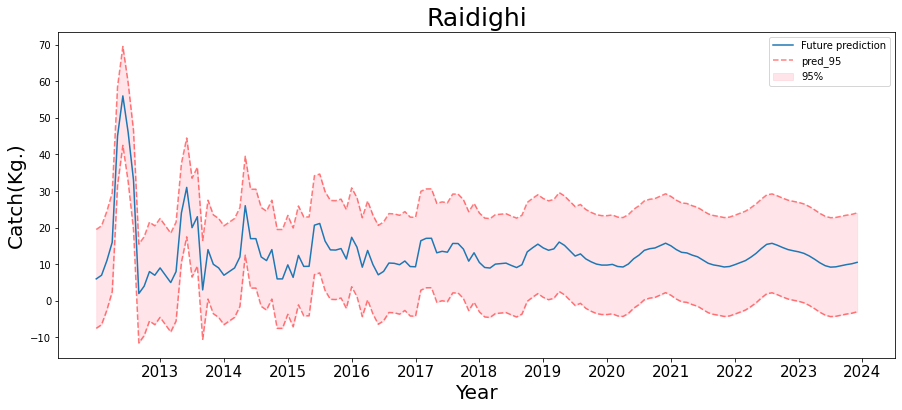

In [7]:
yhat3=old3['Future_prediction'].values
yhat3_b = 1/len(yhat3)*sum(yhat3)
ieta3 = np.sqrt(1/len(yhat3)*sum(np.square(yhat3-yhat3_b)))
ieta3

ieta3
CI_L3 = yhat3_b-1.96*ieta3
CI_U3 = yhat3_b+1.96*ieta3
import matplotlib.pyplot as plt
y_l3=yhat3-1.96*ieta3
y_u3=yhat3+1.96*ieta3
Months=range(0,len(yhat3))
plt.subplots(figsize=(15,6))

plt.plot(yhat3.reshape(-1), label='Future prediction')
plt.plot(y_l3, label='pred_95', c='red', linestyle='--', alpha=0.5)
plt.plot(y_u3, c='red', linestyle='--', alpha=0.5)

plt.fill_between([*range(len(yhat3.reshape(-1)))], y_l3, y_u3, label='95%', color='pink', alpha=.4)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Catch(Kg.)',fontsize=20)
plt.title("Raidighi",fontsize=25)
plt.xticks(12*np.arange(1,13),np.arange(2013,2025), fontsize=15)

plt.legend();


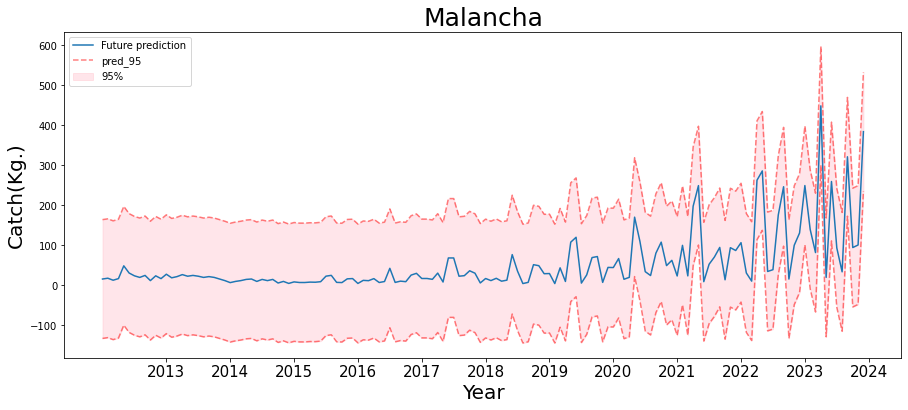

In [9]:
yhat2=old2['Future_prediction'].values
yhat2_b = 1/len(yhat2)*sum(yhat2)
ieta2 = np.sqrt(1/len(yhat2)*sum(np.square(yhat2-yhat2_b)))
ieta2

CI_L2 = yhat2_b-1.96*ieta2
CI_U2 = yhat2_b+1.96*ieta2
import matplotlib.pyplot as plt
y_l2=yhat2-1.96*ieta2
y_u2=yhat2+1.96*ieta2
Months2=range(0,len(yhat2))
plt.subplots(figsize=(15,6))

plt.plot(yhat2.reshape(-1), label='Future prediction')
plt.plot(y_l2, label='pred_95', c='red', linestyle='--', alpha=0.5)
plt.plot(y_u2, c='red', linestyle='--', alpha=0.5)

plt.fill_between([*range(len(yhat2.reshape(-1)))], y_l2, y_u2, label='95%', color='pink', alpha=.4)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Catch(Kg.)',fontsize=20)
plt.title("Malancha",fontsize=25)
plt.xticks(12*np.arange(1,13),np.arange(2013,2025), fontsize=15)

plt.legend();

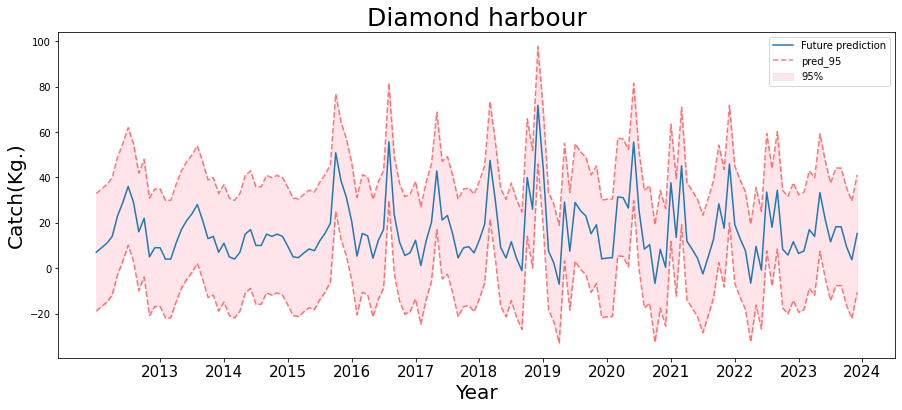

In [10]:
#mse=1/len(yhat1)*sum(np.square(y_input-yhat1))
#mse
yhat1=old1['Future_prediction'].values
yhat1_b = 1/len(yhat1)*sum(yhat1)
ieta1 = np.sqrt(1/len(yhat1)*sum(np.square(yhat1-yhat1_b)))
ieta1
# alpha=0.05, zalpha/2=1.96
ieta1
CI_L1 = yhat1_b-1.96*ieta1
CI_U1 = yhat1_b+1.96*ieta1
import matplotlib.pyplot as plt
y_l1=yhat1-1.96*ieta1
y_u1=yhat1+1.96*ieta1
Months1=range(0,len(yhat1))
plt.subplots(figsize=(15,6))

plt.plot(yhat1.reshape(-1), label='Future prediction')
plt.plot(y_l1, label='pred_95', c='red', linestyle='--', alpha=0.5)
plt.plot(y_u1, c='red', linestyle='--', alpha=0.5)

plt.fill_between([*range(len(yhat1.reshape(-1)))], y_l1, y_u1, label='95%', color='pink', alpha=.4)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Catch(Kg.)',fontsize=20)
plt.title("Diamond harbour",fontsize=25)
plt.xticks(12*np.arange(1,13),np.arange(2013,2025), fontsize=15)
plt.legend();
#print('Confidence Interval :', CI_L , CI_U)

#plt.savefig('Convlstm_DH.jpeg',dpi=500)


### Section 3.2.5 Figure 8 (In manuscript)

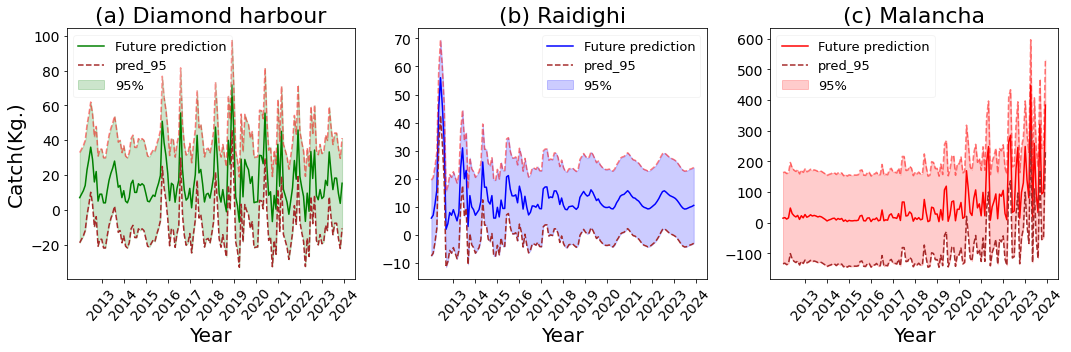

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)


plt.plot(yhat1.reshape(-1), label='Future prediction', c='green')
plt.plot(y_l1, label='pred_95', c='brown', linestyle='--', alpha=1)
plt.plot(y_u1, c='red', linestyle='--', alpha=0.5)
plt.fill_between([*range(len(yhat1.reshape(-1)))], y_l1, y_u1, label='95%', color='green', alpha=0.2)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Catch(Kg.)',fontsize=20)
plt.title("(a) Diamond harbour",fontsize=22)
plt.xticks(12*np.arange(1,13),np.arange(2013,2025), fontsize=14, rotation=50)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=13, framealpha=0.2)

plt.subplot(1,3,2)
plt.plot(yhat3.reshape(-1), label='Future prediction', c='blue')
plt.plot(y_l3, label='pred_95', c='brown', linestyle='--', alpha=1)
plt.plot(y_u3, c='red', linestyle='--', alpha=0.5)
plt.fill_between([*range(len(yhat3.reshape(-1)))], y_l3, y_u3, label='95%', color='blue', alpha=.2)
plt.xlabel('Year',fontsize=20)
#plt.ylabel('Catch(Kg.)',fontsize=20)
plt.title("(b) Raidighi",fontsize=22)
plt.xticks(12*np.arange(1,13),np.arange(2013,2025), fontsize=14, rotation=50)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=13, framealpha=0.2);


plt.subplot(1,3,3)


plt.plot(yhat2.reshape(-1), label='Future prediction', c='red')
plt.plot(y_l2, label='pred_95', c='brown', linestyle='--', alpha=1)
plt.plot(y_u2, c='red', linestyle='--', alpha=0.5)
plt.fill_between([*range(len(yhat2.reshape(-1)))], y_l2, y_u2, label='95%', color='red', alpha=0.2)
plt.xlabel('Year',fontsize=20)
#plt.ylabel('Catch(Kg.)',fontsize=20)
plt.title("(c) Malancha",fontsize=22)
plt.xticks(12*np.arange(1,13),np.arange(2013,2025), fontsize=14, rotation=50)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=13, framealpha=0.2)

plt.tight_layout()



plt.savefig('Best_predictions_DHMR.jpeg',dpi=500)


Reference:
* https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* Meiselwitz, Gabriele. (2020). Social Computing and Social Media. Design, Ethics, User Behavior, and Social Network Analysis 12th International Conference, SCSM 2020, Held as Part of the 22nd HCI International Conference, HCII 2020 Copenhagen, Denmark, July 19–24, 2020 Proceedings, Part I. 10.1007/978-3-030-49570-1.
* Arai, Kohei. (2021). Intelligent Systems and Applications Proceedings of the 2021 Intelligent Systems Conference (IntelliSys), held on July 15-16, 2021 Proceedings, Springer: Volume 1.
* Yi, D. & Ahn, J. & Ji, S.. 2020. An Effective Optimization Method for Machine Learning Based on ADAM. Applied Sciences. 10. 1073. 10.3390/app10031073.
* Zhou, S. & Xie, W. & Lu, Y. & Wang, Y. & Zhou, Y. & Hui, N. & Dong, C. (2021). ConvLSTM-Based Wave Forecasts in the South and East China Seas. Frontiers in Marine Science. 8. 680079. 10.3389/fmars.2021.680079.